In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


<div style="color:white;background-color:#e90045;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center"> <font color="White" size=+5 face="Lucida Calligraphy"><div style="align:center: justify">Heart disease prediction</font></div>

<font color="Blue"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Predicting Heart Disease 💔 using Machine Learning  </h1>

    
<center><img src='https://cdn.dribbble.com/users/497438/screenshots/1543231/media/20f02512c53e80b1e6e09c43eb85f8e3.gif'></center>

In [2]:
import numpy as  np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Default theme
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='Lucida Calligraphy',
              font_scale=1,
              color_codes=True,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.precision", 3)

In [5]:
heart = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [6]:
heart.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000,Up,0


<font color="Red" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">**💘Attributes:**</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">Age:</font>Age of the patient [years]</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">Sex:</font> Sex of the patient [M: Male, F: Female]</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">ChestPainType:</font>Ch Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">RestingBP:</font> Resting blood pressure [mm Hg]</font>
<font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">Cholesterol:</font> Serum cholesterol [mm/dl]</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">FastingBS:</font> Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">RestingECG:</font> Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">MaxHR:</font> Maximum heart rate achieved [Numeric value between 60 and 202]</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">ExerciseAngina:</font>Exercise-induced angina [Y: Yes, N: No]</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">Oldpeak:</font> Oldpeak = ST [Numeric value measured in depression]</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">ST_Slope:</font>The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</font>
    
- <font color="Blue" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify"><font color="red">HeartDisease:</font> Output class [1: heart disease, 0: Normal]</font>

In [7]:
Cholesterol = heart[heart['Cholesterol'] == 0]
Cholesterol

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
298,51,M,ASY,110,0,1,Normal,92,N,0.0,Flat,1
299,47,M,ASY,110,0,1,ST,149,N,2.1,Up,1
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1
301,55,M,ATA,140,0,0,ST,150,N,0.2,Up,0
302,53,M,ASY,125,0,1,Normal,120,N,1.5,Up,1


In [8]:
Cholesterol.shape

(172, 12)

In [9]:
MaxHR = heart[heart['MaxHR'] == 0]
MaxHR

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [10]:
### Converting Zero Value of Cholesterol to NaN Value
heart.loc[heart['Cholesterol'] == 0,'Cholesterol'] = np.nan
heart.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0


In [11]:
heart["Cholesterol"] = heart["Cholesterol"].fillna(heart["Cholesterol"].median())

In [12]:
RestingBP = heart[heart['RestingBP'] == 0]
RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,237.0,0,Normal,155,N,1.5,Flat,1


RestingBP represents the blood pressure of the patient. It is not possible to have values equal to 0, So I'll remove the value 0

In [13]:
heart = heart.drop(heart[(heart['RestingBP'] == 0)].index)

In [14]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

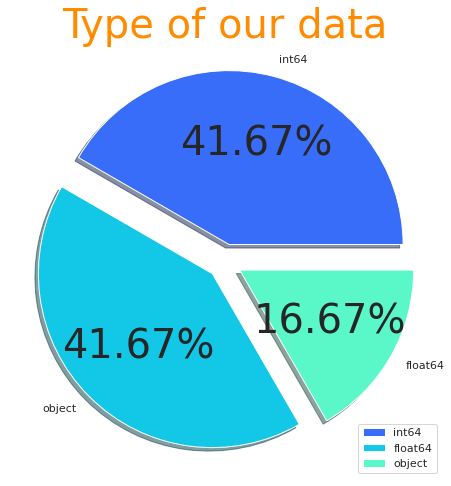

In [15]:
matplotlib.rcParams.update({'font.size': 40})
heart.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('Type of our data', fontsize = 40,color='DarkOrange',font='Lucida Calligraphy');
plt.legend(labels=['int64','float64','object'])
plt.axis('off');

In [16]:
numerical = heart.select_dtypes(include=['int64','float64']).columns
print(numerical)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


In [17]:
categorical = heart.select_dtypes(include=['object']).columns
print(categorical)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [18]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

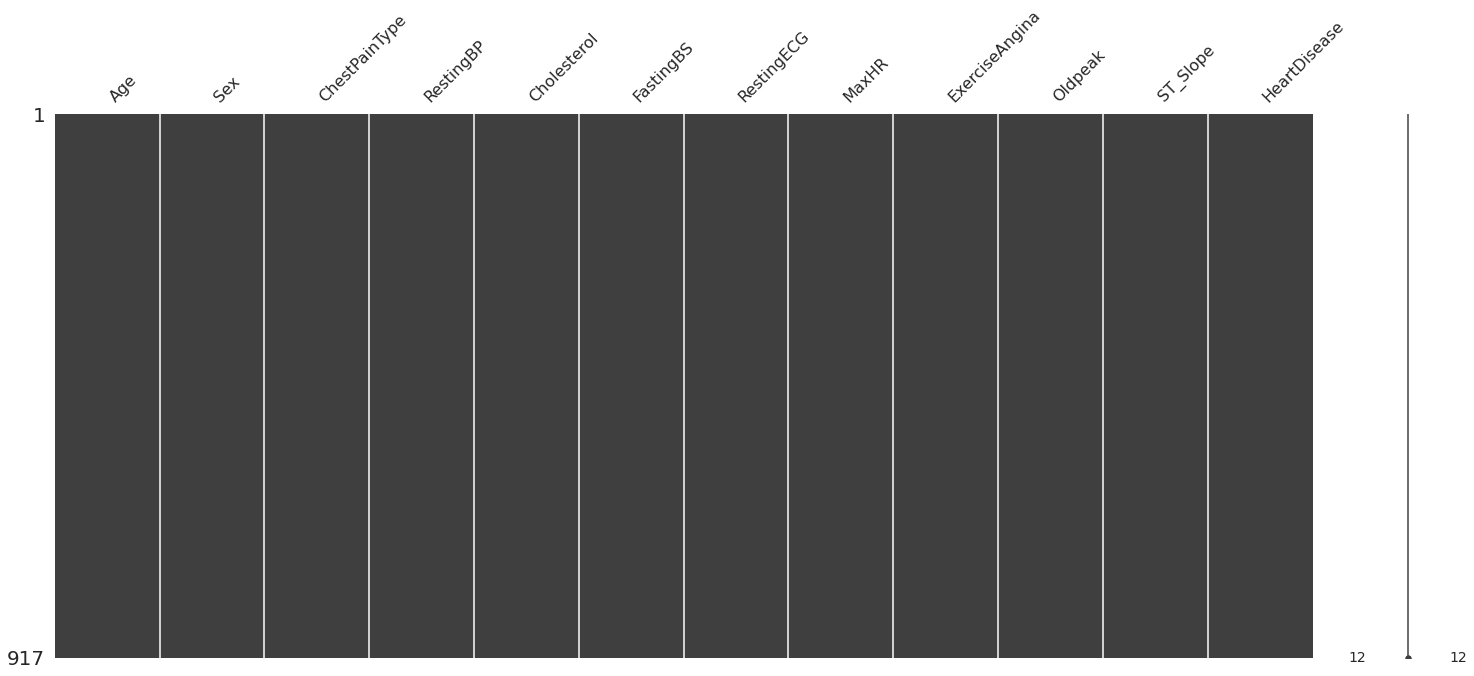

In [19]:
import missingno as msno
msno.matrix(heart)
plt.show()

In [20]:
for col in heart:
    print(col)

Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope
HeartDisease


In [21]:
heart[heart['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,410.000,50.551,9.445,28.000,43.000,51.000,57.000,76.000
RestingBP,410.000,130.180,16.500,80.000,120.000,130.000,140.000,190.000
Cholesterol,410.000,238.683,54.025,85.000,204.000,235.000,266.750,564.000
FastingBS,410.000,0.107,0.310,0.000,0.000,0.000,0.000,1.000
MaxHR,410.000,148.151,23.288,69.000,134.000,150.000,165.000,202.000
Oldpeak,410.000,0.408,0.700,-1.100,0.000,0.000,0.600,4.200
HeartDisease,410.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [22]:
heart[heart['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,507.000,55.901,8.736,31.000,51.000,57.000,62.000,77.000
RestingBP,507.000,134.450,18.929,92.000,120.000,132.000,145.000,200.000
Cholesterol,507.000,246.874,52.714,100.000,225.000,237.000,267.000,603.000
FastingBS,507.000,0.335,0.473,0.000,0.000,0.000,1.000,1.000
MaxHR,507.000,127.602,23.378,60.000,112.000,126.000,144.000,195.000
Oldpeak,507.000,1.274,1.153,-2.600,0.000,1.200,2.000,6.200
HeartDisease,507.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000


In [23]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')
heart.describe().style.apply(highlight_min, props='color:Black;background-color:Pink', axis=0)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000,917.000,917.000,917.000,917.000,917.000,917.000
mean,53.509,132.541,243.212,0.233,136.790,0.887,0.553
std,9.438,18.000,53.430,0.423,25.467,1.067,0.497
min,28.000,80.000,85.000,0.000,60.000,-2.600,0.000
25%,47.000,120.000,214.000,0.000,120.000,0.000,0.000
50%,54.000,130.000,237.000,0.000,138.000,0.600,1.000
75%,60.000,140.000,267.000,0.000,156.000,1.500,1.000
max,77.000,200.000,603.000,1.000,202.000,6.200,1.000


In [24]:
# summary statistics of categorical columns
heart.describe(include = [np.object])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,917,917,917,917,917
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,724,496,551,546,459


In [25]:
# Displaying all correlations with ascending sort.
heart.corr().unstack().sort_values(ascending=False).drop_duplicates()

Age           Age             1.000
Oldpeak       HeartDisease    0.404
HeartDisease  Age             0.282
FastingBS     HeartDisease    0.268
RestingBP     Age             0.263
Age           Oldpeak         0.259
              FastingBS       0.198
Oldpeak       RestingBP       0.174
HeartDisease  RestingBP       0.118
RestingBP     Cholesterol     0.086
HeartDisease  Cholesterol     0.076
FastingBS     RestingBP       0.068
Oldpeak       Cholesterol     0.055
              FastingBS       0.053
Cholesterol   Age             0.046
FastingBS     Cholesterol     0.025
MaxHR         Cholesterol    -0.002
              RestingBP      -0.110
              FastingBS      -0.131
Oldpeak       MaxHR          -0.161
MaxHR         Age            -0.382
              HeartDisease   -0.401
dtype: float64

In [26]:
heart.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000,0.263,0.046,0.198,-0.382,0.259,0.282
RestingBP,0.263,1.000,0.086,0.068,-0.110,0.174,0.118
Cholesterol,0.046,0.086,1.000,0.025,-0.002,0.055,0.076
FastingBS,0.198,0.068,0.025,1.000,-0.131,0.053,0.268
MaxHR,-0.382,-0.110,-0.002,-0.131,1.000,-0.161,-0.401
Oldpeak,0.259,0.174,0.055,0.053,-0.161,1.000,0.404
HeartDisease,0.282,0.118,0.076,0.268,-0.401,0.404,1.000


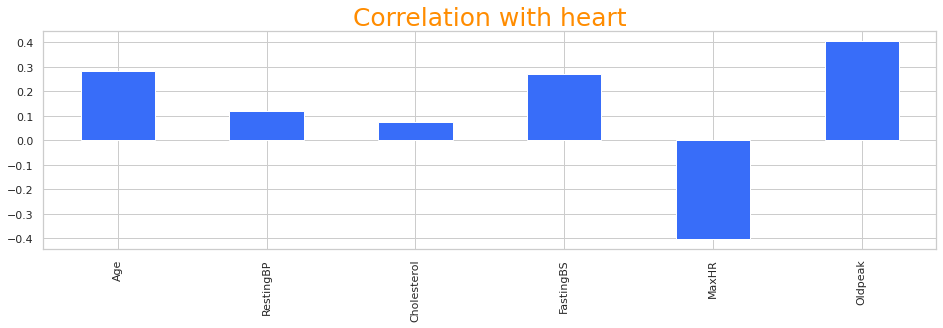

In [27]:
#Correlation with Response Variable class
X = heart.drop(['HeartDisease'], axis=1)
y = heart['HeartDisease']

X.corrwith(y).plot.bar(figsize=(16, 4), rot=90, grid=True)
plt.title('Correlation with heart',
          fontsize=25,
          color='DarkOrange',
          font='Lucida Calligraphy')
plt.show()

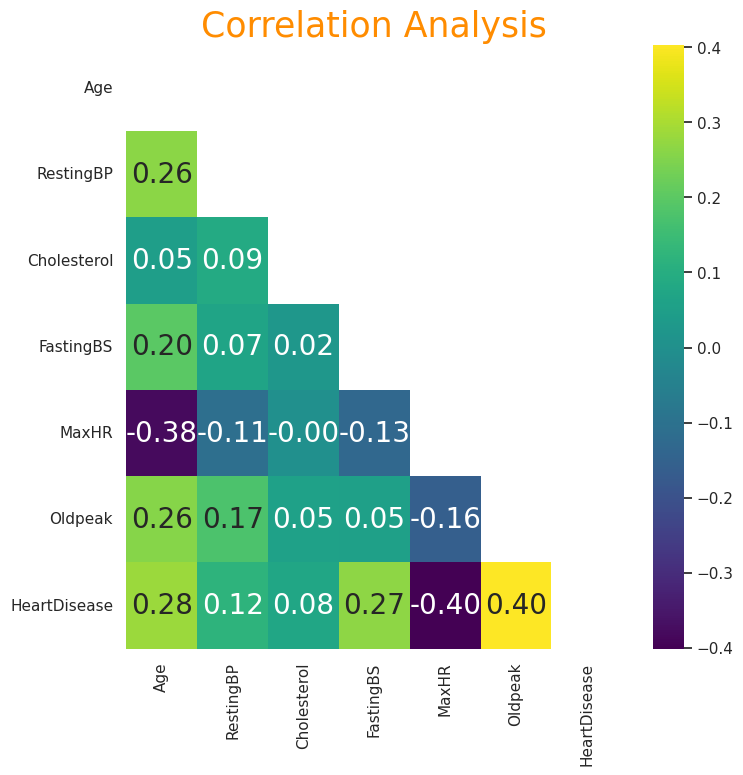

In [28]:
matplotlib.rcParams.update({'font.size': 20})

corr = heart.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis',
          fontsize=25,
          color='DarkOrange',
          font='Lucida Calligraphy')
sns.heatmap(corr,
            mask=mask,
            annot=True,
            lw=0,
            linecolor='white',
            cmap='viridis',
            fmt="0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [29]:
for col in heart[categorical]:
    print(heart[categorical][col].value_counts()) 
    print("****"*10)

M    724
F    193
Name: Sex, dtype: int64
****************************************
ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64
****************************************
Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64
****************************************
N    546
Y    371
Name: ExerciseAngina, dtype: int64
****************************************
Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64
****************************************


In [30]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = heart[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

Cholesterol    1.446
FastingBS      1.263
Oldpeak        1.025
dtype: float64

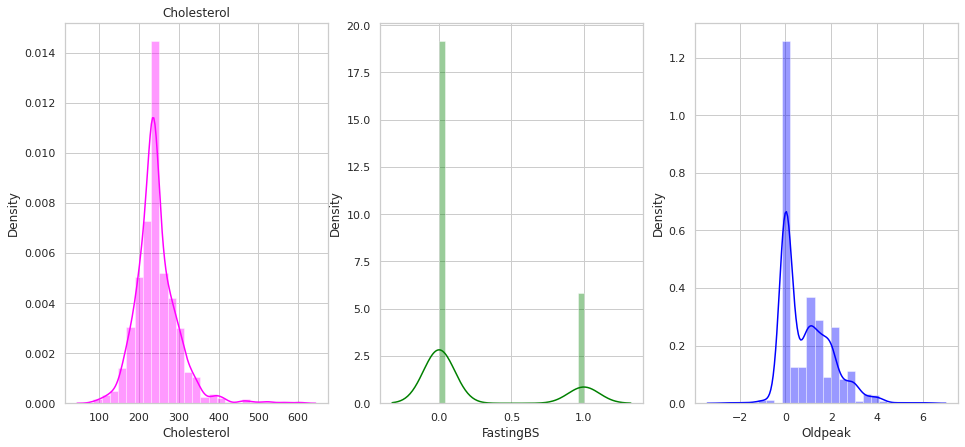

In [31]:
plt.figure(figsize=(16,7))

plt.subplot(131)
sns.distplot(heart["Cholesterol"],bins=25, color="magenta", label="Skewness : %.2f"%(heart["Cholesterol"].skew()));
plt.title('Cholesterol')

plt.subplot(132)
sns.distplot(heart["FastingBS"],bins=25, color="green", label="Skewness : %.2f"%(heart["FastingBS"].skew()));

plt.subplot(133)
sns.distplot(heart["Oldpeak"],bins=25, color="Blue", label="Skewness : %.2f"%(heart["Oldpeak"].skew()));

<font color="Red"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Red"> Value & percentage Count </h1>

In [32]:
def percent_counts(df, feature):
   
    total = df.loc[:,feature].value_counts(dropna=False)
    percent = round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2)
    percent_count = pd.concat([total, percent],keys=['Total','Percentage'], axis = 1)
    
    return percent_count

<font color="Blue" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Sex percentage distribution count</font>

In [33]:
percent_counts(heart,'Sex').style.background_gradient(cmap='coolwarm').set_precision(2)

,Total,Percentage
M,724,78.95
F,193,21.05


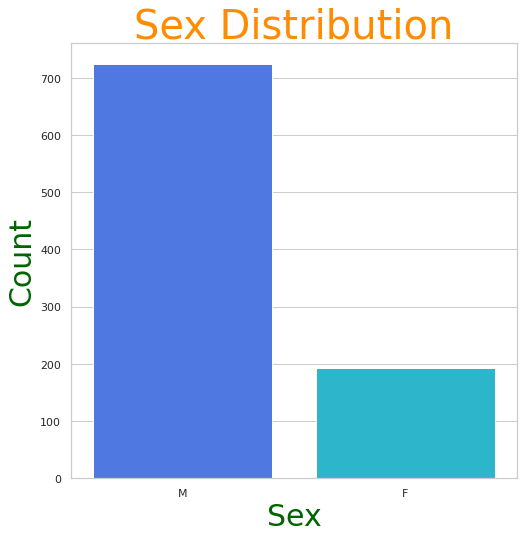

In [34]:
sns.countplot(data=heart,x='Sex');
plt.title('Sex Distribution', fontsize = 40,color='DarkOrange',font='Lucida Calligraphy')
plt.xlabel('Sex', fontsize = 30,color='DarkGreen',font='Lucida Calligraphy')
plt.ylabel('Count', fontsize = 30,color='DarkGreen',font='Lucida Calligraphy');

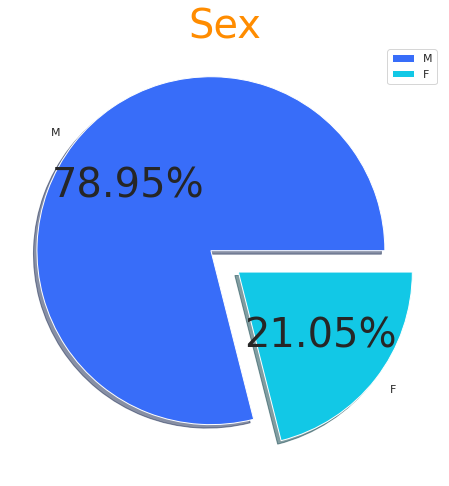

In [35]:
matplotlib.rcParams.update({'font.size': 40})
ax=heart['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 40,color='DarkOrange',font='Lucida Calligraphy');
plt.legend(labels=['M','F'])
plt.axis('off');

<font color="Blue" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">ChestPainType percentage distribution count</font>

In [36]:
percent_counts(heart,'ChestPainType').style.background_gradient(cmap='coolwarm').set_precision(2)

,Total,Percentage
ASY,496,54.09
NAP,202,22.03
ATA,173,18.87
TA,46,5.02


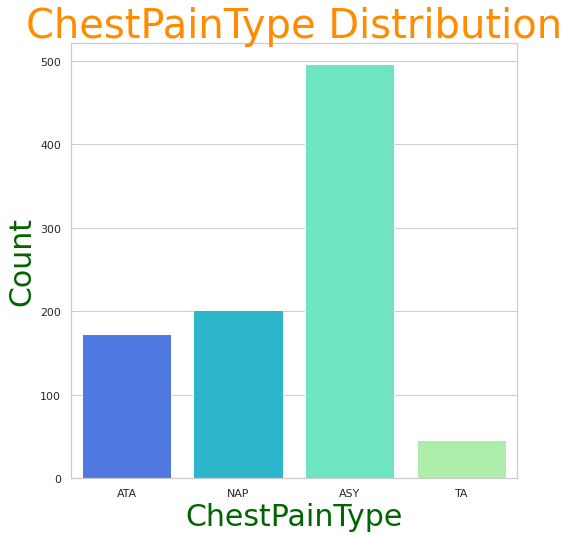

In [37]:
sns.countplot(data=heart,x='ChestPainType');
plt.title('ChestPainType Distribution', fontsize = 40,color='DarkOrange',font='Lucida Calligraphy')
plt.xlabel('ChestPainType', fontsize = 30,color='DarkGreen',font='Lucida Calligraphy')
plt.ylabel('Count', fontsize = 30,color='DarkGreen',font='Lucida Calligraphy');

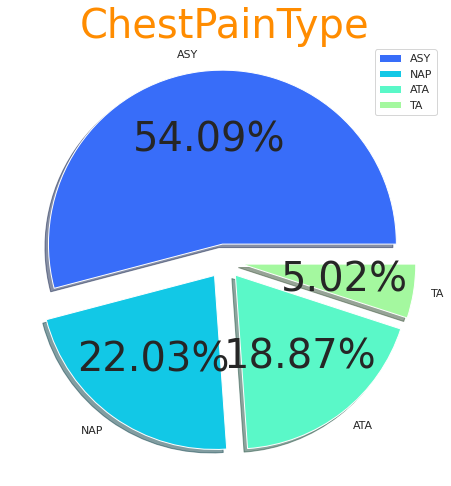

In [38]:
ax=heart['ChestPainType'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "ChestPainType", fontsize = 40,color='DarkOrange',font='Lucida Calligraphy')
plt.legend(labels=['ASY','NAP','ATA','TA'])
plt.axis('off');

<font color="Blue" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">RestingECG percentage distribution count</font>

In [39]:
percent_counts(heart,'RestingECG').style.background_gradient(cmap='coolwarm').set_precision(2)

,Total,Percentage
Normal,551,60.09
LVH,188,20.50
ST,178,19.41


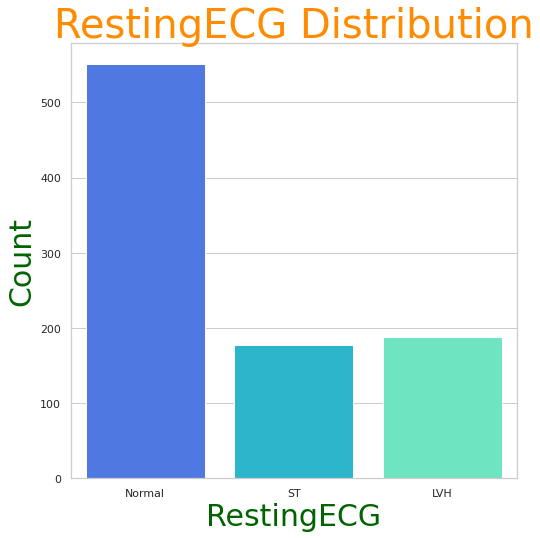

In [40]:
sns.countplot(data=heart,x='RestingECG');
plt.title('RestingECG Distribution', fontsize = 40,color='DarkOrange',font='Lucida Calligraphy')
plt.xlabel('RestingECG', fontsize = 30,color='DarkGreen',font='Lucida Calligraphy')
plt.ylabel('Count', fontsize = 30,color='DarkGreen',font='Lucida Calligraphy');

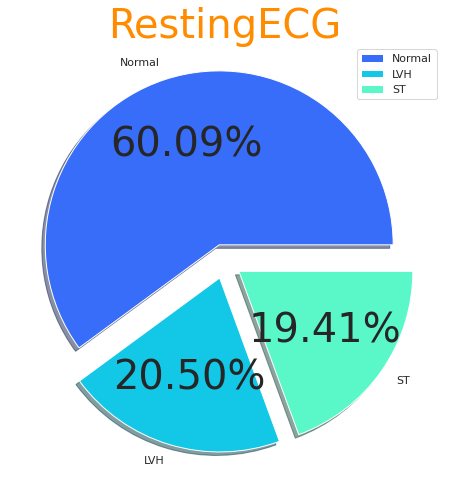

In [41]:
ax=heart['RestingECG'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "RestingECG", fontsize = 40,color='DarkOrange',font='Lucida Calligraphy')
plt.legend(labels=['Normal','LVH','ST'])
plt.axis('off');

<font color="Blue" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">ExerciseAngina percentage distribution count</font>

In [42]:
percent_counts(heart,'ExerciseAngina').style.background_gradient(cmap='coolwarm').set_precision(2)

,Total,Percentage
N,546,59.54
Y,371,40.46


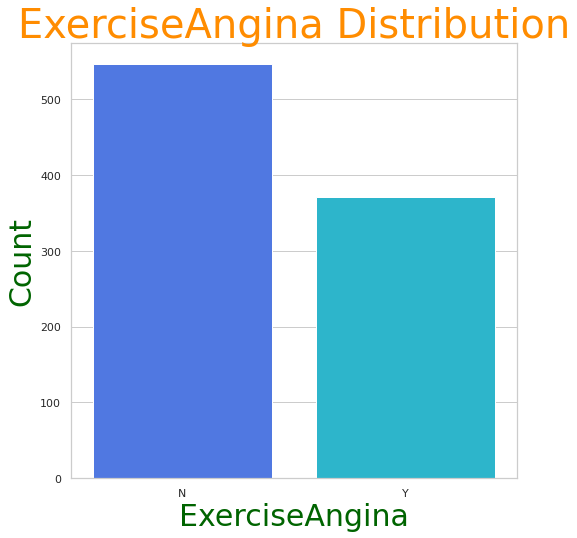

In [43]:
sns.countplot(data=heart,x='ExerciseAngina');
plt.title('ExerciseAngina Distribution', fontsize = 40,color='DarkOrange',font='Lucida Calligraphy')
plt.xlabel('ExerciseAngina', fontsize = 30,color='DarkGreen',font='Lucida Calligraphy')
plt.ylabel('Count', fontsize = 30,color='DarkGreen',font='Lucida Calligraphy');

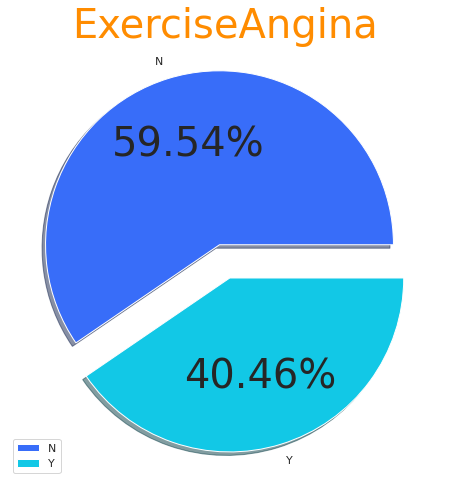

In [44]:
ax=heart['ExerciseAngina'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "ExerciseAngina", fontsize = 40,color='DarkOrange',font='Lucida Calligraphy');
plt.legend(labels=['N','Y'])
plt.axis('off');

<font color="Blue" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">ST_Slope percentage distribution count</font>

In [45]:
percent_counts(heart,'ST_Slope').style.background_gradient(cmap='coolwarm').set_precision(2)

,Total,Percentage
Flat,459,50.05
Up,395,43.08
Down,63,6.87


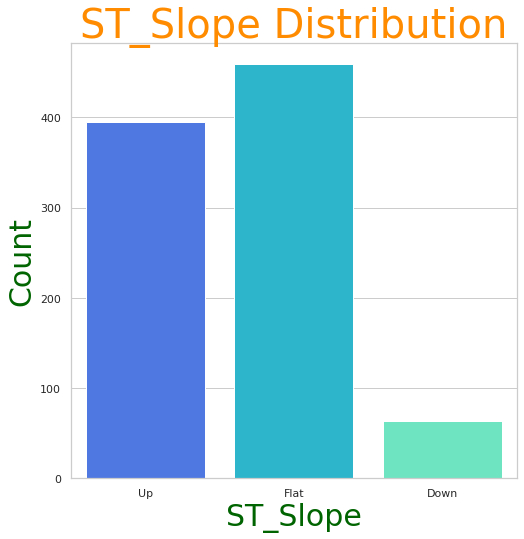

In [46]:
sns.countplot(data=heart,x='ST_Slope');
plt.title('ST_Slope Distribution', fontsize = 40,color='DarkOrange',font='Lucida Calligraphy')
plt.xlabel('ST_Slope', fontsize = 30,color='DarkGreen',font='Lucida Calligraphy')
plt.ylabel('Count', fontsize = 30,color='DarkGreen',font='Lucida Calligraphy');

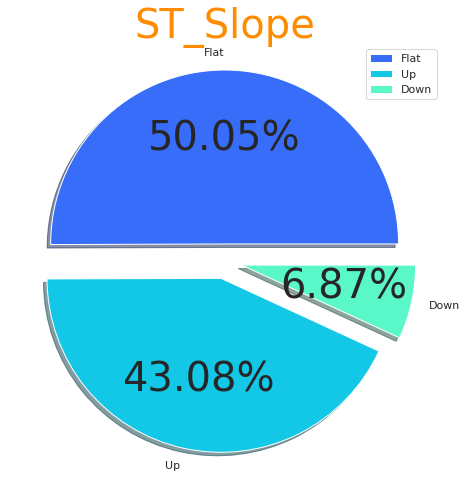

In [47]:

ax=heart['ST_Slope'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "ST_Slope", fontsize = 40,color='DarkOrange',font='Lucida Calligraphy');
plt.legend(labels=['Flat','Up','Down'])
plt.axis('off');

In [48]:
from IPython.core.display import HTML
def multi_table(table_list):
    
    return HTML(
        '<table><tr style="background-color:Aqua;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')
df_groupby = {var: pd.DataFrame(heart.groupby([var, 'HeartDisease']).size()) 
              for var in {'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'}}
multi_table([df_groupby['ChestPainType'], df_groupby['Sex'], df_groupby['RestingECG'], 
             df_groupby['ExerciseAngina'], df_groupby['ST_Slope']])

<font color="OrangeRed" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify">Categorical feature (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope) is converted into numerical feature by using pandas dummy method</font>

In [49]:
heart = pd.get_dummies(heart,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1


<font color="Red"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Red"> Train Test Split </h1>

In [50]:
X = heart.drop(['HeartDisease'],axis=1) 
y = heart['HeartDisease']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

<font color="Red"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Red"> Standardizing the data by using StandardScaler </h1>

In [52]:
# scaling dataset with robust scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=X.columns)
X_test = pd.DataFrame(X_test_std, columns=X.columns)

In [53]:
display(X_train.head())
display(X_test.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.052,0.970,-0.903,-0.552,-0.581,-0.832,0.516,-0.482,1.881,-0.23,0.815,-0.491,-0.824,-1.001,1.15
1,0.052,0.415,1.232,-0.552,0.126,-0.832,-1.937,2.074,-0.532,-0.23,-1.227,2.038,-0.824,-1.001,1.15
2,0.158,-0.030,2.056,-0.552,-0.188,0.294,0.516,-0.482,-0.532,-0.23,0.815,-0.491,1.213,0.999,-0.87
3,-1.114,0.970,0.202,-0.552,1.501,-0.832,-1.937,-0.482,1.881,-0.23,0.815,-0.491,-0.824,-1.001,1.15
4,-0.372,0.415,-0.229,-0.552,0.126,3.857,0.516,-0.482,-0.532,-0.23,-1.227,2.038,1.213,0.999,-0.87


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.370,-0.141,1.213,-0.552,-1.524,0.106,-1.937,-0.482,-0.532,4.351,0.815,-0.491,-0.824,0.999,-0.87
1,-1.114,-0.697,-1.277,-0.552,-0.660,0.106,0.516,-0.482,-0.532,-0.230,0.815,-0.491,1.213,0.999,-0.87
2,-1.432,-0.697,4.172,1.812,0.598,0.106,0.516,-0.482,-0.532,-0.230,0.815,-0.491,1.213,0.999,-0.87
3,-1.114,-0.697,-1.240,-0.552,-0.660,1.513,0.516,-0.482,-0.532,-0.230,-1.227,-0.491,1.213,0.999,-0.87
4,0.476,-0.364,-0.116,1.812,-1.052,1.044,0.516,2.074,-0.532,-0.230,0.815,-0.491,1.213,0.999,-0.87


<font color="Red"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:40px; color:Red">Model Implementation</h1>

<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> LogisticRegression</h2>

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

print("Training Accuracy    :",log_train,"%")
print("Model Accuracy Score :",log_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_log))
print("Classification_Report: \n",classification_report(y_test,y_pred_log))

Training Accuracy    : 86.63 %
Model Accuracy Score : 85.33 %
Confusion Matrix: 
 [[61 15]
 [12 96]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        76
           1       0.86      0.89      0.88       108

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [55]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=logreg, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 85.66 %
Std. Dev: 3.57 %


<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Support Vector Machines</h2>

In [56]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_f1 = round(f1_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy     :",svc_train,"%")
print("Model Accuracy Score  :",svc_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))

Training Accuracy     : 91.13 %
Model Accuracy Score  : 86.41 %
Confusion Matrix: 
 [[61 15]
 [10 98]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        76
           1       0.87      0.91      0.89       108

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [57]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=svc, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 86.21 %
Std. Dev: 3.25 %


<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> KNeighborsClassifier</h2>

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy     :",knn_train,"%")
print("Model Accuracy Score  :",knn_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training Accuracy     : 90.59 %
Model Accuracy Score  : 83.7 %
Confusion Matrix: 
 [[59 17]
 [13 95]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        76
           1       0.85      0.88      0.86       108

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [59]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=knn, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 84.15 %
Std. Dev: 5.79 %


<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> GaussianNB</h2>

In [60]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_NB = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(y_pred_NB, y_test) * 100, 2)
gaussian_f1 = round(f1_score(y_pred_NB, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train,"%")
print("Model Accuracy Score  :",gaussian_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_NB))
print("Classification_Report: \n",classification_report(y_test,y_pred_NB))

Training Accuracy     : 86.36 %
Model Accuracy Score  : 82.61 %
Confusion Matrix: 
 [[60 16]
 [16 92]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        76
           1       0.85      0.85      0.85       108

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [61]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=gaussian, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 85.39 %
Std. Dev: 3.71 %


<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Perceptron</h2>

In [62]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)
perceptron_f1 = round(f1_score(y_pred_perceptron, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train,"%")
print("Model Accuracy Score :",perceptron_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_perceptron))
print("Classification_Report: \n",classification_report(y_test,y_pred_perceptron))

Training Accuracy    : 85.4 %
Model Accuracy Score : 84.24 %
Confusion Matrix: 
 [[60 16]
 [13 95]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        76
           1       0.86      0.88      0.87       108

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [63]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=perceptron, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 75.55 %
Std. Dev: 5.90 %


<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> LinearSVC</h2>

In [64]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_LinearSVC = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(y_pred_LinearSVC, y_test) * 100, 2)
linear_svc_f1 = round(f1_score(y_pred_LinearSVC, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train,"%")
print("Model Accuracy Score :",linear_svc_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_LinearSVC))
print("Classification_Report: \n",classification_report(y_test,y_pred_LinearSVC))

Training Accuracy    : 86.77 %
Model Accuracy Score : 86.41 %
Confusion Matrix: 
 [[62 14]
 [11 97]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83        76
           1       0.87      0.90      0.89       108

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [65]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=linear_svc, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 86.07 %
Std. Dev: 3.39 %


<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> SGDClassifier</h2>

In [66]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_SGD = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(y_pred_SGD, y_test) * 100, 2)
sgd_f1 = round(f1_score(y_pred_SGD, y_test) * 100, 2)

print("Training Accuracy     :",sgd_train,"%")
print("Model Accuracy Score  :",sgd_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_SGD))
print("Classification_Report: \n",classification_report(y_test,y_pred_SGD))

Training Accuracy     : 81.72 %
Model Accuracy Score  : 84.78 %
Confusion Matrix: 
 [[61 15]
 [13 95]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        76
           1       0.86      0.88      0.87       108

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [67]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=sgd, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 77.05 %
Std. Dev: 8.62 %


<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> DecisionTreeClassifier</h2>

In [68]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_Decision = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_Decision, y_test) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, y_test) * 100, 2)

print("Training Accuracy     :",decision_train,"%")
print("Model Accuracy Score  :",decision_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Decision))
print("Classification_Report: \n",classification_report(y_test,y_pred_Decision))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 78.26 %
Confusion Matrix: 
 [[52 24]
 [16 92]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72        76
           1       0.79      0.85      0.82       108

    accuracy                           0.78       184
   macro avg       0.78      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [69]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=decision, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 79.39 %
Std. Dev: 3.48 %


<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> RandomForestClassifier</h2>

In [70]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_random, y_test) * 100, 2)
random_forest_f1 = round(f1_score(y_pred_random, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train,"%")
print("Model Accuracy Score  :",random_forest_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_random))
print("Classification_Report: \n",classification_report(y_test,y_pred_random))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 85.33 %
Confusion Matrix: 
 [[61 15]
 [12 96]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        76
           1       0.86      0.89      0.88       108

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [71]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=random_forest, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 85.39 %
Std. Dev: 4.01 %


<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> MLPClassifier</h2>

In [72]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_MLP = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(y_pred_MLP, y_test) * 100, 2)
mlp_f1 = round(f1_score(y_pred_MLP, y_test) * 100, 2)

print("Training Accuracy     :",mlp_train,"%")
print("Model Accuracy Score  :",mlp_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_MLP))
print("Classification_Report: \n",classification_report(y_test,y_pred_MLP))

Training Accuracy     : 92.91 %
Model Accuracy Score  : 86.96 %
Confusion Matrix: 
 [[62 14]
 [10 98]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        76
           1       0.88      0.91      0.89       108

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [73]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=mlp, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 85.66 %
Std. Dev: 3.67 %


<font color="Blue"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> XGBClassifier</h2>

In [74]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy     :",xgb_train,"%")
print("Model Accuracy Score  :",xgb_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 86.41 %
Confusion Matrix: 
 [[61 15]
 [10 98]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        76
           1       0.87      0.91      0.89       108

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



<font color="#ff4500" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Model Accuracy Score with K-Fold Cross Validation</font>

In [75]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=xgb, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 84.31 %
Std. Dev: 2.47 %


<font color="Red"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Red"> Comparing Models</h1>

In [76]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Support Vector Machines', 'KNeighborsClassifier', 
        'GaussianNB','Perceptron', 'Linear SVC','Stochastic Gradient Decent',
        'Decision Tree','Random Forest', 'MLPClassifier' ,'XGBClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ],
    'Model f1 Score': [
        log_f1, svc_f1, knn_f1, gaussian_f1, perceptron_f1,
        linear_svc_f1, sgd_f1, decision_f1, random_forest_f1,
        mlp_f1, xgb_f1
    ]
})

In [77]:
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score,Model f1 Score
9,MLPClassifier,92.91,86.96,89.09
1,Support Vector Machines,91.13,86.41,88.69
5,Linear SVC,86.77,86.41,88.58
10,XGBClassifier,100.00,86.41,88.69
0,Logistic Regression,86.63,85.33,87.67
8,Random Forest,100.00,85.33,87.67
6,Stochastic Gradient Decent,81.72,84.78,87.16
4,Perceptron,85.40,84.24,86.76
2,KNeighborsClassifier,90.59,83.70,86.36
3,GaussianNB,86.36,82.61,85.19
